# <div align='center'> **Fault Detection**

In [2]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from scipy.stats import f
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# <div align='center'> **Visualizing the Features of the Iris dataset**

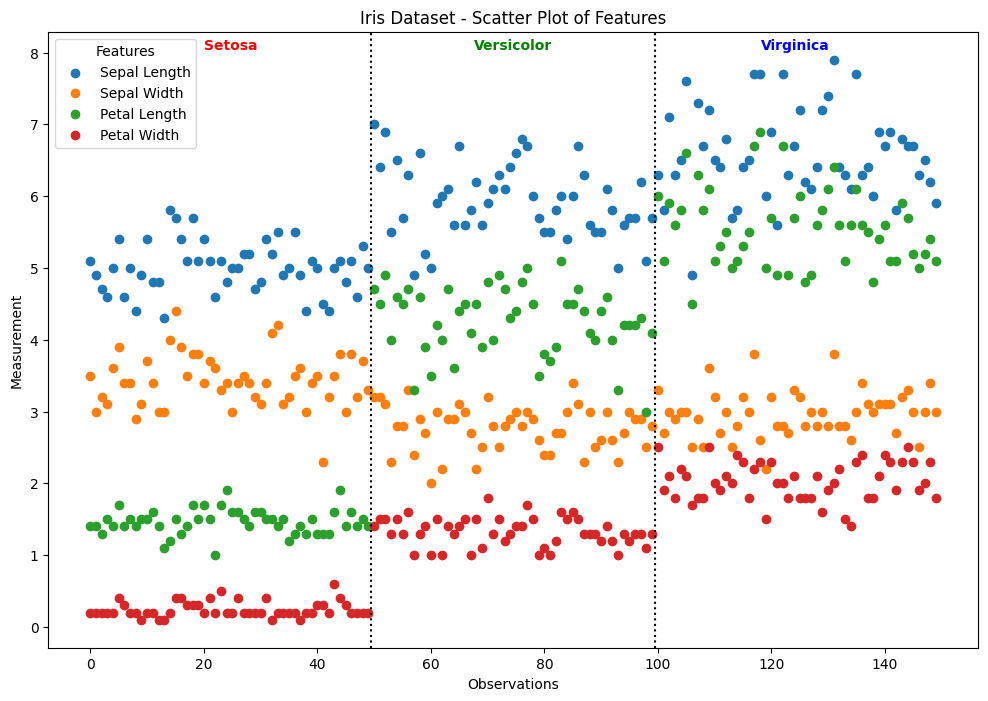

In [3]:
# Load the Iris dataset from seaborn
iris_data = sns.load_dataset("iris")

# Define the features and their labels
features = {
    'sepal_length': 'Sepal Length',
    'sepal_width': 'Sepal Width',
    'petal_length': 'Petal Length',
    'petal_width': 'Petal Width'
}
# Create a single plot for all features
plt.figure(figsize=(12, 8))

# Iterate through the features and plot scatter plots
for feature, label in features.items():
    plt.scatter(iris_data.index, iris_data[feature], label=label)

# Add legends and labels
plt.legend(title='Features')
plt.xlabel('Observations')
plt.ylabel('Measurement')
plt.title('Iris Dataset - Scatter Plot of Features')

# Draw dotted lines to separate classes
for index in [49.5, 99.5]:
    plt.axvline(index, color='black', linestyle='dotted')

# Add class labels
class_labels = ['Setosa', 'Versicolor', 'Virginica']
for i, label in enumerate(class_labels):
    plt.text(24.75 + i * 49.75, 8, label, ha='center', va='bottom', color=['red', 'green', 'blue'][i], fontweight='bold')

# Show the plot
plt.show()


In [4]:
# Basic statistics
# Group the data by the 'species' column
grouped_data = iris_data.groupby('species')

# Calculate the mean for each class
mean_values = grouped_data.mean().transpose()
print("Mean values:\n", mean_values)

# Calculate the standard deviation for each class
std_values = grouped_data.std().transpose()
print("Standard deviation values:\n", std_values)


Mean values:
 species       setosa  versicolor  virginica
sepal_length   5.006       5.936      6.588
sepal_width    3.428       2.770      2.974
petal_length   1.462       4.260      5.552
petal_width    0.246       1.326      2.026
Standard deviation values:
 species         setosa  versicolor  virginica
sepal_length  0.352490    0.516171   0.635880
sepal_width   0.379064    0.313798   0.322497
petal_length  0.173664    0.469911   0.551895
petal_width   0.105386    0.197753   0.274650


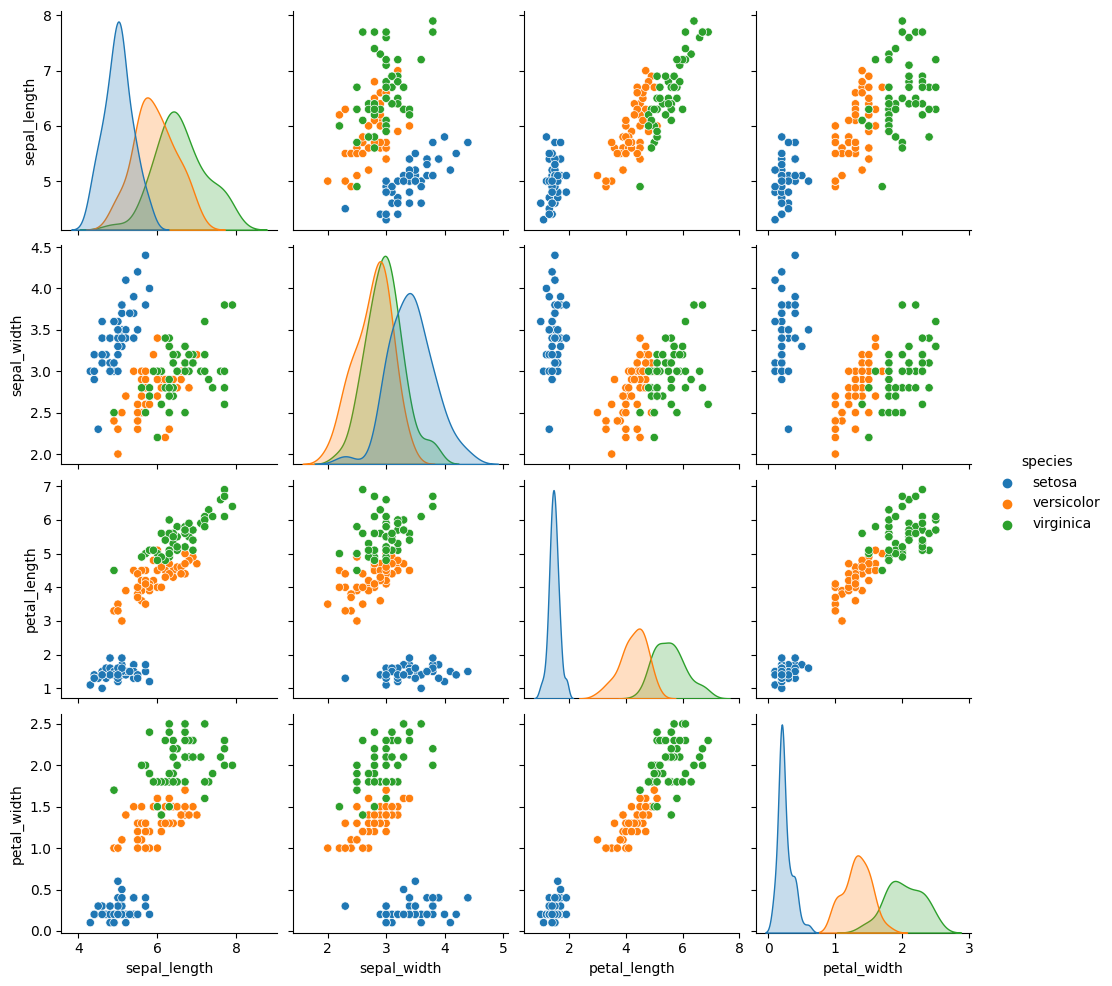

In [5]:
# Create a single plot for all pairwise scatter plots
sns.pairplot(iris_data, hue='species')

# <div align='center'> **$T^{2}$ Statistics**
- $T^{2}$ statistic is used to detect faults in multivariate process data.
- Assumption: $\Lambda = \Sigma^{T} \Sigma$ is invertible.

In [6]:
# Defining the dependent and independent variables
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Filter data points for class 3 (Iris Setosa)
class_3_indices = np.where(y == 0)
X_class_3 = X[class_3_indices]
y_class_3 = y[class_3_indices]

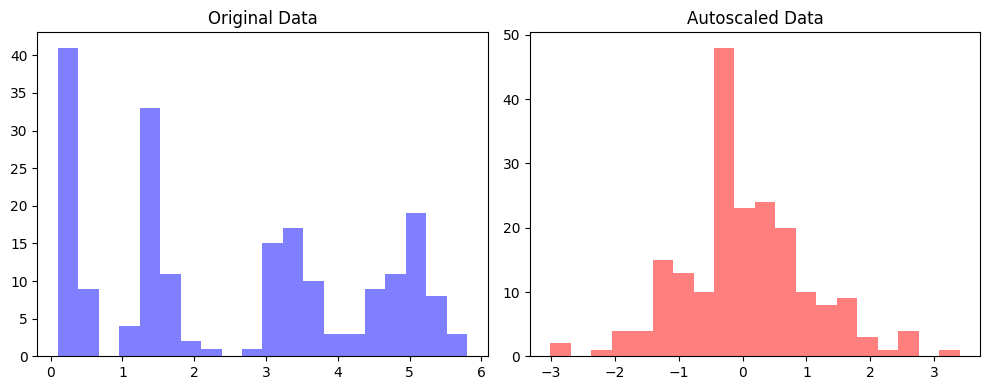

In [7]:
# Autoscaling and visualization
X_scaled = preprocessing.scale(X_class_3)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot original data
axes[0].hist(X_class_3.flatten(), bins=20, color='blue', alpha=0.5)
axes[0].set_title('Original Data')

# Plot autoscaled data
axes[1].hist(X_scaled.flatten(), bins=20, color='red', alpha=0.5)
axes[1].set_title('Autoscaled Data')

# Set plot labels and layout
plt.tight_layout()
plt.show()

In [8]:
# Calculating sample covariance
cov_matrix = np.cov(X_scaled.T)
cov_matrix

array([[1.02040816, 0.7577007 , 0.27262833, 0.28377383],
       [0.7577007 , 1.02040816, 0.1813265 , 0.23750205],
       [0.27262833, 0.1813265 , 1.02040816, 0.338398  ],
       [0.28377383, 0.23750205, 0.338398  , 1.02040816]])

In [9]:
# # Calculating sample covariance (manually)
# cov_matrix = 1/(50-1) * X_scaled.T@X_scaled
# print("The covariance calculated using tools is:\n",cov_matrix)

In [10]:
# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


# Sort eigenvalues and eigenvectors in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_indices]
eigenvectors_sorted = eigenvectors[:, eigenvalue_indices]

Lambda = np.diag(eigenvalues_sorted)

print("Diagonal matrix of eigenvalues (Lambda):\n", Lambda)

# Print the eigenvalues and eigenvectors
for i in range(len(eigenvalues_sorted)):
    print("Eigenvalue", i+1, ":", eigenvalues_sorted[i])
    print("Eigenvector", i+1, ":", eigenvectors_sorted[:, i])
    print()

Diagonal matrix of eigenvalues (Lambda):
 [[2.10055124 0.         0.         0.        ]
 [0.         1.04303902 0.         0.        ]
 [0.         0.         0.68144923 0.        ]
 [0.         0.         0.         0.25659316]]
Eigenvalue 1 : 2.1005512399063404
Eigenvector 1 : [0.6044164  0.57561937 0.37543478 0.40297876]

Eigenvalue 2 : 1.043039024650952
Eigenvector 2 : [ 0.33499079  0.44084607 -0.6269717  -0.54803504]

Eigenvalue 3 : 0.6814492293736026
Eigenvector 3 : [-6.73598261e-02 -7.13823888e-04 -6.77062810e-01  7.32835654e-01]

Eigenvalue 4 : 0.25659315913033187
Eigenvector 4 : [ 0.71966982 -0.68870645 -0.08683986 -0.01475204]



## For a given observation vector 'x', $T^{2}$ statistic is given by: $T^{2} = x^{T}V \Lambda^{-1}V^{T}x$

In [11]:
# Extracting a sample from the class 3 data
x= X_scaled[3, :].reshape((4,1))
x_T = np.transpose(X)
V = eigenvectors_sorted
V_T = eigenvectors_sorted.T

# Taking inverse of Lambda
Lambda_inv = np.diag(1 / np.diag(Lambda))

print("Diagonal matrix Lambda:\n", Lambda)
print("Inverse of Lambda:\n", Lambda_inv)

Diagonal matrix Lambda:
 [[2.10055124 0.         0.         0.        ]
 [0.         1.04303902 0.         0.        ]
 [0.         0.         0.68144923 0.        ]
 [0.         0.         0.         0.25659316]]
Inverse of Lambda:
 [[0.47606551 0.         0.         0.        ]
 [0.         0.9587369  0.         0.        ]
 [0.         0.         1.46746075 0.        ]
 [0.         0.         0.         3.89722003]]


In [12]:
#Calculating T squared
T_2 = x.T@V@Lambda_inv@V.T@x
print("T squared:", T_2)

T squared: [[1.70620698]]


In [13]:
# Calculating the Hotelling's T-squared statistic with loading matrix
P = eigenvectors_sorted[:, :2]
print("Loading matrix:\n", P)

lambda_sel = np.diag(eigenvalues_sorted)[:2, :2]
lambda_sel_inv = np.linalg.inv(lambda_sel)
T_2_P = x.T@P@lambda_sel_inv@P.T@x
print("T squared:", T_2_P)


Loading matrix:
 [[ 0.6044164   0.33499079]
 [ 0.57561937  0.44084607]
 [ 0.37543478 -0.6269717 ]
 [ 0.40297876 -0.54803504]]
T squared: [[1.23887184]]


# <div align='center'> **$T^{2}$ Statistic Threshold**
If the actual mean and co-variance are known, then the $T^{2}$ statistic thereshold for a confidence level is given by: $\chi_{\alpha} ^{2}(a)$

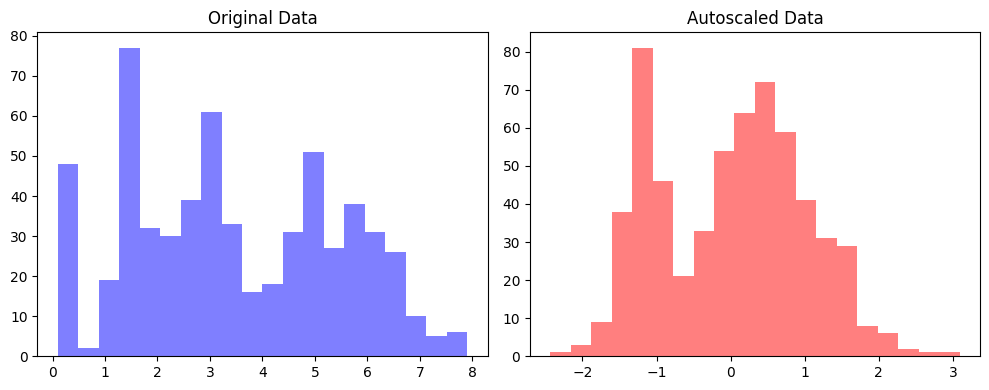

In [14]:
# Autoscale the iris data
X_scaled1 = preprocessing.scale(X)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot original data
axes[0].hist(X.flatten(), bins=20, color='blue', alpha=0.5)
axes[0].set_title('Original Data')

# Plot autoscaled data
axes[1].hist(X_scaled1.flatten(), bins=20, color='red', alpha=0.5)
axes[1].set_title('Autoscaled Data')

# Set plot labels and layout
plt.tight_layout()
plt.show()

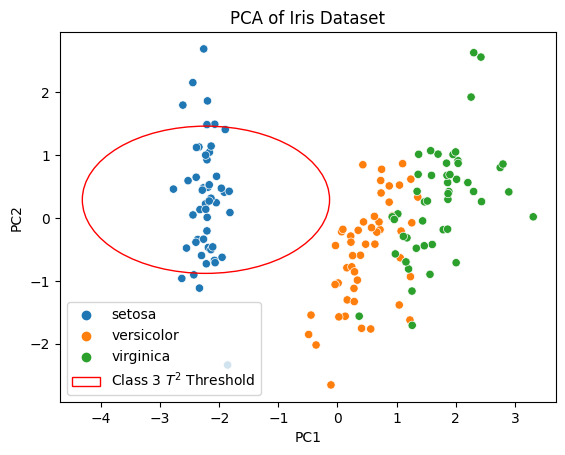

In [15]:
# Performimg PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled1)
y_labels = [target_names[i] for i in y]


# Calculating the T2 threshold for class 3 data
class3_indices = np.where(y == 0)[0]
class3_data = X_pca[class3_indices, :]
confidence_level = 0.95
threshold = chi2.ppf(confidence_level, df=2)

# Creating a scatter plot of the transformed data
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_labels,)

# Adding the T2 threshold ellipse for class 3 data
ellipse = Ellipse(xy=np.mean(class3_data, axis=0), width=2 * np.sqrt(threshold) * np.sqrt(pca.explained_variance_ratio_[0]),
                  height=2 * np.sqrt(threshold) * np.sqrt(pca.explained_variance_ratio_[1]), edgecolor='red', facecolor='none',
                  label='Class 3 $T^2$ Threshold')

# Adding the ellipse to the plot
plt.gca().add_patch(ellipse)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.legend()

# Show the plot
plt.show()


In [16]:
# Calculating T2 statistic threshold when sample covariance is used

# calcualting F_alpha(a,n-a) = (a = 2, n-a = 48) with alpha = 0.05 (confidence interval)
alpha = 0.05  # Significance level
dfn = 2  # Degrees of freedom numerator
dfd = 48  # Degrees of freedom denominator

critical_value = f.ppf(1 - alpha, dfn, dfd)

print("Critical value F_alpha(a, n-a):", critical_value)

Critical value F_alpha(a, n-a): 3.190727335928499


In [17]:
# Calculating T^2 statistic threshold
n = 50
a = 2
T_2_alpha = ((a * (n - 1) * (n + 1)) / (n * (n - a))) * critical_value
print("T^2 threshold:", T_2_alpha)

T^2 threshold: 6.644689677071099


# <div align='center'> **Outliers in Training Set**
- Outliers in the training set can be detected using the $T^{2}$ statistic for a selected confidence level = $\frac{(n-1)^{2}(a/(n-a-1))F_{\alpha}(a, n-a-1)}{n(1+(a/(n-a-1))F_{\alpha}(a,n-a-1))}$

In [18]:
alpha = 0.05  # Significance level

# Calculate F_alpha(a, n-a-1)
f_alpha = f.ppf(alpha, a, n - a - 1)

# Calculate T^2 statistic
threshold_outl= ((n - 1) ** 2 * (a / (n - a - 1)) * f_alpha) / (n * (1 + (a / (n - a - 1))) * f_alpha)
threshold_outl


1.9599999999999997

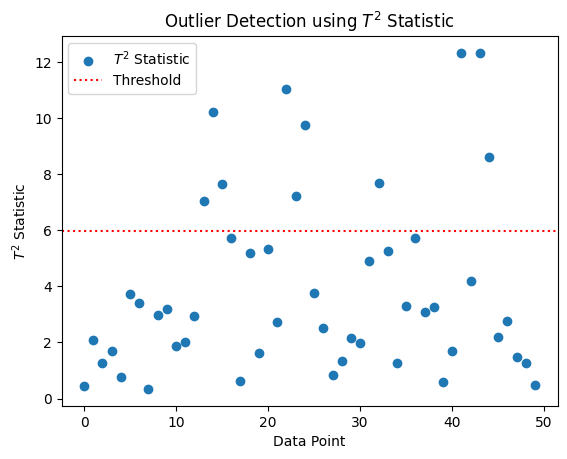

In [19]:
t_squared_values = []
for i in range(len(X_scaled)):
    x= X_scaled[i, :].reshape((4,1))
    t_squared = x.T@V@Lambda_inv@V.T@x
    t_squared_values.append(t_squared)

# Create a scatter plot of the T^2 statistic values
plt.scatter(range(len(t_squared_values)), t_squared_values, label='$T^2$ Statistic')

# Plot the threshold as a dotted line
plt.axhline(y=threshold, linestyle='dotted', color='red', label='Threshold')

# Add labels and title to the plot
plt.xlabel('Data Point')
plt.ylabel('$T^2$ Statistic')
plt.title('Outlier Detection using $T^2$ Statistic')

# Add a legend
plt.legend()

# Show the plot
plt.show()



# <div align='center'> **Q - Statistics**

- Measures the deviation of the observations to the lower dimensional PCA representation

In [21]:
I = np.identity(4)
# calculating Residual vector
Q_stat_values = []
for data_point in X_scaled1:
    # calculating Residual vector
    r = (I - P @ P.T) @ data_point.reshape((4,1))

    # calculating Q statistic
    Q = r.T @ r
    Q_stat_values.append(Q)

# converting the Q statistics to a numpy array
Q_stat_values = np.array(Q_stat_values)

# Printing the Q statistics
print("The Q statistics are:\n", Q_stat_values)

The Q statistics are:
 [[[1.47428645e+00]]

 [[3.55527910e-01]]

 [[1.17732199e+00]]

 [[1.04245139e+00]]

 [[2.13154260e+00]]

 [[2.58053211e+00]]

 [[2.25068022e+00]]

 [[1.31815386e+00]]

 [[7.66563637e-01]]

 [[5.86852508e-01]]

 [[1.62821473e+00]]

 [[1.76368021e+00]]

 [[4.68587117e-01]]

 [[1.22303308e+00]]

 [[1.92318699e+00]]

 [[4.53418009e+00]]

 [[2.55837011e+00]]

 [[1.48895859e+00]]

 [[1.40456663e+00]]

 [[2.88245541e+00]]

 [[6.72869627e-01]]

 [[2.39668376e+00]]

 [[3.23968533e+00]]

 [[8.73825367e-01]]

 [[1.82783459e+00]]

 [[2.73101478e-01]]

 [[1.35405271e+00]]

 [[1.28314453e+00]]

 [[9.37933395e-01]]

 [[1.20561354e+00]]

 [[7.27434396e-01]]

 [[6.62427438e-01]]

 [[4.35127758e+00]]

 [[3.90218330e+00]]

 [[5.76991567e-01]]

 [[6.73630133e-01]]

 [[7.40472701e-01]]

 [[2.39354956e+00]]

 [[1.06464157e+00]]

 [[1.12608437e+00]]

 [[1.70730556e+00]]

 [[6.40538089e-02]]

 [[1.81637317e+00]]

 [[1.84252221e+00]]

 [[2.95281992e+00]]

 [[4.84952785e-01]]

 [[2.894412

# Q statistic distribution is approximated as 
$Q_{\alpha} = \theta_{1}[\frac{h_{0}c_{\alpha}\sqrt{2\theta_{2}}}{\theta_{1}} + 1 + \frac{\theta_{2}h_{0}(h_{0}-1)}{\theta_{1}^{2}}]^{1/h_{0}}$  
where:<br>
$\theta_{i} = \sum_{j=a+1}^{n}\sigma_{j}^{2i}$ and<br> $h_{0} = 1- \frac {2\theta_{1}\theta_{3}}{3\theta_{2}^{2}}$


In [22]:
# Number of eigenvalues
n = 4
# Define the number of excluded principal components (k)
k = 2
# Determine the value of a
a = X.shape[1] - k
# Perform the manual calculation for θ
theta_1 = 0
i = 1  # Set i to 1
for j in range(a + 1, len(eigenvalues_sorted)):
    theta_1 = eigenvalues_sorted[j]**(2 * i)  # Use 2 * i as the power

print("θ_1:", theta_1)

# Perform the manual calculation for θᵢ
theta_2 = 0
i = 2  # Set i to 1
for j in range(a + 1, len(eigenvalues_sorted)):
    theta_2 = eigenvalues_sorted[j]**(2 * i)  # Use 2 * i as the power

print("θ_2:", theta_2)

# Perform the manual calculation for θᵢ
theta_3 = 0
i = 3  # Set i to 1
for j in range(a + 1, len(eigenvalues_sorted)):
    theta_3 = eigenvalues_sorted[j]**(2 * i)  # Use 2 * i as the power

print("θ_3:", theta_3)

θ_1: 0.06584004931248381
θ_2: 0.004334912093470301
θ_3: 0.00028541082599936704


In [23]:
h_0 = 1 - (2 * theta_1 * theta_3) / (3 * theta_2**2)
print("h_0:", h_0)

h_0: 0.3333333333333335


In [24]:
from scipy.stats import norm

alpha = 0.05  # Significance level (e.g., 0.05 for a 95% confidence level)
c_alpha = norm.ppf(1 - alpha)  # Calculate ca

print("ca:", c_alpha)

ca: 1.6448536269514722


In [25]:
import math
# Calculate Q_alpha
Q_alpha = theta_1 * math.pow((h_0 * c_alpha * math.sqrt(2 * theta_2) / theta_1) + 1 + (theta_2 * h_0 * (h_0 - 1)) / (theta_1 ** 2), 1 / h_0)

print("Q_alpha:", Q_alpha)

Q_alpha: 0.2466871161711275


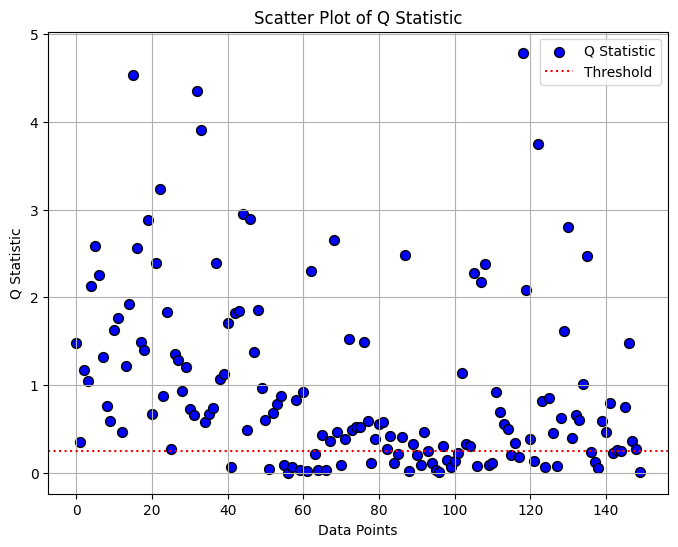

In [26]:
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.scatter(range(len(Q_stat_values)), Q_stat_values, label='Q Statistic', marker='o', color='blue', edgecolors='black', s=50)

# Plot the threshold as a dotted line
plt.axhline(y=Q_alpha, linestyle='dotted', color='red', label='Threshold')

# Add x and y-axis labels
plt.xlabel('Data Points')
plt.ylabel('Q Statistic')
plt.title('Scatter Plot of Q Statistic')

# Enable grid lines
plt.grid(True)
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Dataset for Practice
- Palmer Penguins dataset.
- Use the following command to install the package: 
    - *pip install palmerpenguins*
    - *from palmerpenguins import load_penguins*